[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5]
[0.50003143 0.50223221 0.50448825 0.50679994 0.50916771 0.51159196
 0.51407313 0.51661169 0.5192081  0.52186285 0.52457643 0.52734937
 0.53018219 0.53307545 0.5360297  0.53904554 0.54212356 0.54526437
 0.5484686  0.55173691 0.55506996 0.55846843 0.56193303 0.56546448
 0.5690635  0.57273087 0.57646734 0.58027373 0.58415083 0.58809948]
0.0022007776817782876
0.002256040655721603
0.0023116971671414133
0.0023677621740081367
0.0024242507462461926
0.0024811780695875862
0.0025385594505054065
0.0025964103202661404
0.0026547462399789667
0.0027135829051097016
0.002772936150255978
0.0028328219542865796
0.002893256444898018
0.002954255903986791
0.003015836772830016
0.0030780156567236094
0.0031408093315133945
0.0032042347474036115
0.0032683090359622025
0.0033330495147254613
0.0033984736934636883
0.0034645992794946068
0.0035314441841247657
0.0035990

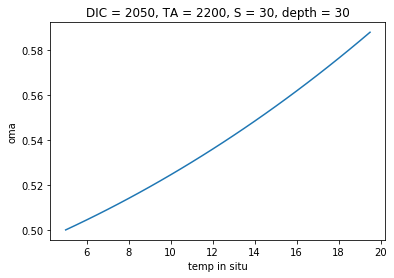

In [25]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
from matplotlib import pyplot as plt
import numpy as np

temp = np.arange(5,20,0.5)
oma = np.zeros_like(temp)
print(temp)
tdepths = 30
tsra = 30
ttera = 7
ttara = 2200 * 1e-3
tdra = 2220 * 1e-3
tzero = 0
#tpressure = 0
tpressure =1
tzero = tpressure * 0 

tsra_psu = tsra*35/35.16504
ttera_is = gsw.t_from_CT(tsra,ttera,tzero)
for i in range(0,len(temp)):
    
    ttera = temp[i]
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)
    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepths, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup
    #print(OmegaA)
    oma[i] = OmegaA
    
plt.plot(temp,oma)
print(oma)
plt.xlabel('temp in situ')
plt.ylabel('oma')
plt.title('DIC = 2050, TA = 2200, S = 30, depth = 30')
for i in range(0,len(oma)-1):
    print(oma[i+1]-oma[i])

In [2]:
print(pH)

[7.78451342]


In [5]:
ls /data/tjarniko/mocsy 

ChangeLog                         logo/
Doxyfile                          mainpage.txt
dual_num_auto_diff.mod            Makefile
examples/                         MANIFEST.in
gsw_mod_baltic_data.mod           mocsy/
gsw_mod_error_functions.mod       mocsy.cpython-37m-x86_64-linux-gnu.so*
gsw_mod_kinds.mod                 notebooks/
gsw_mod_saar_data.mod             README.rst
gsw_mod_specvol_coefficients.mod  requirements.txt
gsw_mod_teos10_constants.mod      setup.py
gsw_mod_toolbox.mod               src/
LICENSE                           test/
